# **Ukraine Russia War Twitter Sentiment Analysis**

import dependencies

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [66]:
data = pd.read_csv('/content/War - Sentimental analysis.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.609710e+18,1.609710e+18,2023-01-02 00:48:48 UTC,02-01-2023,00:48:48,0,1.222980e+18,gabimartinsa,Gabi,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.609710e+18,1.609710e+18,2023-01-02 00:48:48 UTC,02-01-2023,00:48:48,0,1.577720e+18,petadactyl,Dactyl,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Chaleck', 'name': '🌻Check In...",NaN,NaN,NaN,NaN
2,1.609710e+18,1.609670e+18,2023-01-02 00:48:47 UTC,02-01-2023,00:48:47,0,1.608110e+18,valetaizong,Vale L'italiana,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NYCyrano', 'name': 'NYCyrano...",NaN,NaN,NaN,NaN
3,1.609710e+18,1.609650e+18,2023-01-02 00:48:47 UTC,02-01-2023,00:48:47,0,1.603800e+18,yieldingperry,Perry Yielding,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Brav0s', 'name': 'Brandon de...",NaN,NaN,NaN,NaN
4,1.609710e+18,1.609710e+18,2023-01-02 00:48:46 UTC,02-01-2023,00:48:46,0,1.534540e+18,jackcouteau,Jack Couteau 🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [67]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [68]:
data = data[["username", 'tweet', 'language']]
data.head()

,username,tweet,language
0,gabimartinsa,Posse do Lula juntou representantes da Rússia ...,pt
1,petadactyl,@Chaleck Over more than Taiwan. They hate The...,en
2,valetaizong,@NYCyrano @ladyonorato @VeraVanHorne Questo è ...,it
3,yieldingperry,@Brav0s @DailyCaller Russia wont even own Russ...,nl
4,jackcouteau,Russia is a terrorist state. Russia must be ex...,en


In [69]:
# check null
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [70]:
data['language'].value_counts()

en     8670
pt      357
it      289
qme     166
und      84
in       72
es       52
ca       40
ru       36
ja       28
fr       27
qht      26
de       24
th       16
pl       14
nl       14
sv       14
fi       12
et       11
ro        8
tr        5
cy        5
qam       5
uk        5
tl        4
vi        4
cs        3
no        2
zxx       1
zh        1
is        1
ar        1
eu        1
da        1
bn        1
ht        1
iw        1
fa        1
am        1
el        1
Name: language, dtype: int64

In [71]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def clean(text):
  text = str(text).lower()
  text = re.sub("\[.*?\]", "", text)
  text = re.sub('https?://\s+|www.\.\s+', '', text)
  text = re.sub('<.*?>+', '',text)
  text = re.sub("[%s]" % re.escape(string.punctuation), '', text)
  text = re.sub("\n", "", text)
  text = re.sub('\w*\d*w', '', text)
  text = [word for word in text.split(" ") if word not in stopword]
  text = "".join(text)
  text = [stemmer.stem(word) for word in text.split(" ")]
  text = "".join(text)
  return text
data['tweet'] = data["tweet"].apply(clean)

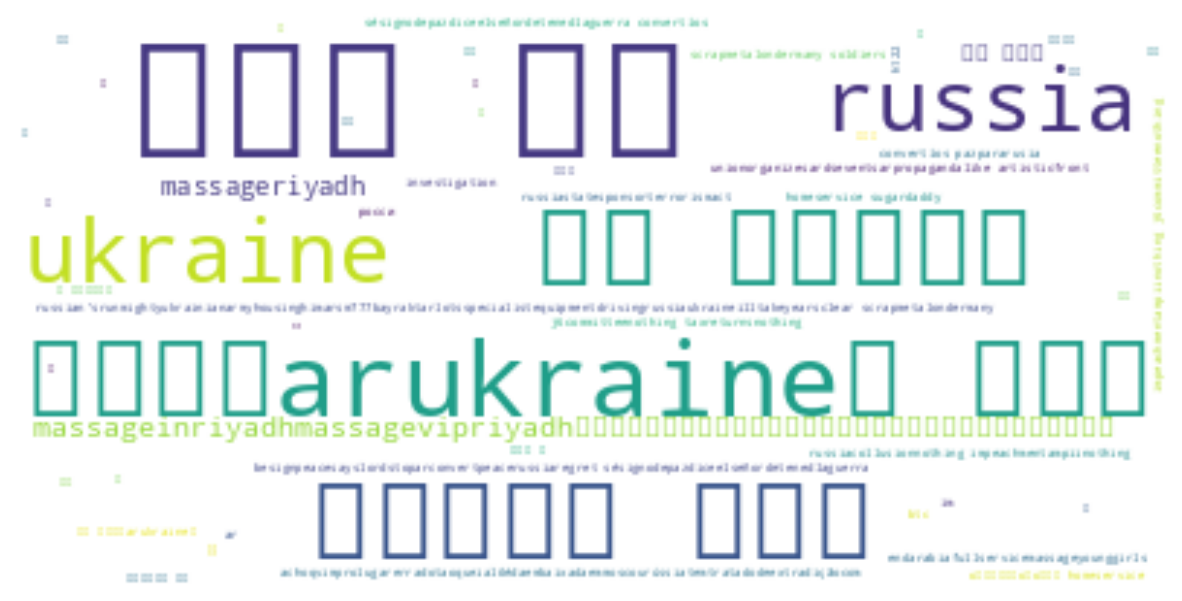

In [73]:
text = "".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordclouad = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordclouad, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['tweet']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['tweet']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['tweet']]
data = data[['tweet', 'Positive','Negative','Neutral']]
data.head(50)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,posselulajuntourepresentantesdarússiaeucrâniam...,0.0,0.0,1.0
1,chaleckhateestorkingithrussiaplandestroygener,0.0,0.0,1.0
2,nycyranoladyonoratoveravanhornequestoèilnazism...,0.0,0.0,1.0
3,brav0sdailycallerrussiaontevennrussia12month,0.0,0.0,1.0
4,russiaterroriststaterussiamustexpelledunsecuri...,0.0,0.0,1.0
5,ukrainianprisonerarvyacheslavandreevdescribedf...,0.0,0.0,1.0
6,nmancilliamnhuttonscepticalgermanpaymentsrussi...,0.0,0.0,1.0
7,detjanssenigorsushkothat'sunfairstatementpeopl...,0.0,0.0,1.0
8,ayendrussiaukrainear'militarysolution'viayoutub,0.0,0.0,1.0
9,it'sinterconnectedrussiachinairanpretendingepa...,0.0,0.0,1.0


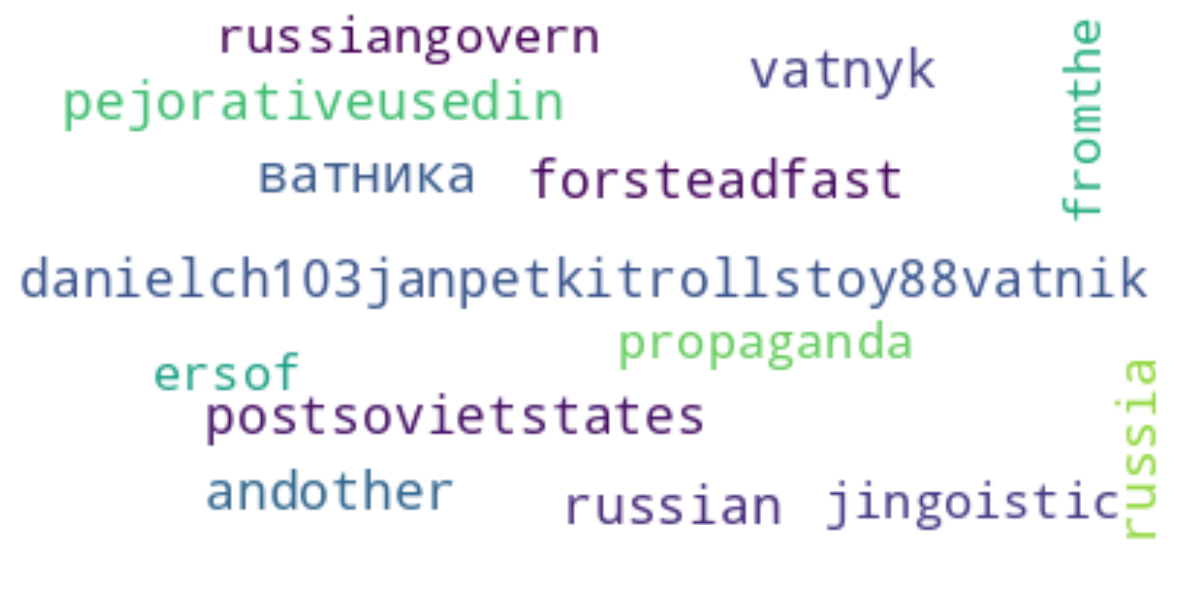

In [79]:
negative = ''.join([i for i in data['tweet'] [data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordclouad = WordCloud(stopwords=stopwords, background_color='white').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordclouad, interpolation='bilinear')
plt.axis('off')
plt.show()
